In [2]:
import praw
import pandas as pd
from datetime import datetime, timedelta

reddit = praw.Reddit(client_id='bXtAhWN0WHSWefpIUsYW8w',
                     client_secret='8VqDnarqQzRRcFlQDMDJPYEr6jV7kw',
                     user_agent='Decent_Condition_826')

In [3]:
print(reddit.read_only)

True


In [63]:
def get_reddit_data(subreddits, keywords, time_range=365, limit_per_sub=10):
    """
    从多个子reddit收集包含特定关键词的帖子和评论
    
    参数:
    subreddits: 子reddit名称列表
    keywords: 关键词列表
    time_range: 时间范围(天)
    limit_per_sub: 每个子reddit获取的帖子数量
    """
    end_time = datetime.now()
    start_time = end_time - timedelta(days=time_range)
    
    all_data = []
    
    for subreddit_name in subreddits:
        try:
            subreddit = reddit.subreddit(subreddit_name)
            
            # 搜索包含关键词的帖子
            for keyword in keywords:
                search_results = subreddit.search(
                    keyword, 
                    time_filter='year', 
                    limit=limit_per_sub
                )
                
                for submission in search_results:
                    # 检查帖子时间是否在范围内
                    post_time = datetime.utcfromtimestamp(submission.created_utc)
                    if post_time < start_time:
                        continue
                    
                    # 获取帖子数据
                    post_data = {
                        'type': 'post',
                        'id': submission.id,
                        'title': submission.title,
                        'content': submission.selftext,
                        'author': str(submission.author),
                        'score': submission.score,
                        'upvote_ratio': submission.upvote_ratio,
                        'num_comments': submission.num_comments,
                        'created_utc': submission.created_utc,
                        'subreddit': subreddit_name,
                        'url': submission.url,
                        'keyword': keyword
                    }
                    all_data.append(post_data)
                    
                    # 获取评论数据（限制最多20条评论）
                    submission.comments.replace_more(limit=5)
                    for comment in submission.comments.list()[:20]:
                        comment_data = {
                            'type': 'comment',
                            'id': comment.id,
                            'post_id': submission.id,
                            'content': comment.body,
                            'author': str(comment.author),
                            'score': comment.score,
                            'created_utc': comment.created_utc,
                            'subreddit': subreddit_name,
                            'keyword': keyword
                        }
                        all_data.append(comment_data)
                        
        except Exception as e:
            print(f"Error processing subreddit {subreddit_name}: {str(e)}")
            continue
    
    return pd.DataFrame(all_data)

# 定义要监控的子reddit和关键词
subreddits = ['sneakers','running','fitness','malefashionadvice', 'femalefashionadvice', 'streetwear']
keywords = ['Nike']

# 收集数据
df = get_reddit_data(subreddits, keywords)

/var/folders/9p/c1r1xtp969d9gbl728dzqnl40000gn/T/ipykernel_21884/745787575.py:30: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  post_time = datetime.utcfromtimestamp(submission.created_utc)


In [64]:
df 

,type,id,title,content,author,score,upvote_ratio,num_comments,created_utc,subreddit,url,keyword,post_id
0,post,1kptk8e,Guy in crowd at OKC/Denver game with Nike Mags,He must have a lot of money. Or they're reps.,WrickDinkles,4488,0.97,405.0,1.747600e+09,sneakers,https://i.redd.it/zywyb8c0ol1f1.jpeg,Nike,NaN
1,comment,mt0fgfq,NaN,He is sitting front row in game 7 buddy. He ha...,Critical-Ad3905,3846,NaN,NaN,1.747600e+09,sneakers,NaN,Nike,1kptk8e
2,comment,mt0gn1c,NaN,I’ve never seen anybody pull off a good fit in...,bangbangcity,693,NaN,NaN,1.747601e+09,sneakers,NaN,Nike,1kptk8e
3,comment,mt0jzb4,NaN,He’s been to every home game since the Thunder...,Trill405,598,NaN,NaN,1.747602e+09,sneakers,NaN,Nike,1kptk8e
4,comment,mt0k12y,NaN,That dude owns a shoe store in OKC called Kick...,Inevitable-Section10,159,NaN,NaN,1.747602e+09,sneakers,NaN,Nike,1kptk8e
...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,comment,m7q2dkg,NaN,last photo is great,None,3,NaN,NaN,1.737160e+09,streetwear,NaN,Nike,1i2svbk
856,comment,m7ibw7u,NaN,Stop posting,exaltedcum7,10,NaN,NaN,1.737058e+09,streetwear,NaN,Nike,1i2svbk
857,comment,m7hwl2w,NaN,why do you look AI generated,coleoleoptera,3,NaN,NaN,1.737054e+09,streetwear,NaN,Nike,1i2svbk
858,comment,m7u5w8p,NaN,AI,Intelligent-Common98,2,NaN,NaN,1.737223e+09,streetwear,NaN,Nike,1i2svbk


In [10]:
df.to_csv('data c.csv')

In [11]:
data = pd.read_csv('data c.csv')
data.head(10)

,Unnamed: 0,type,id,title,content,author,score,upvote_ratio,num_comments,created_utc,subreddit,url,keyword,post_id
0,0,post,1l10t08,"7.8kg Haul to UK. ASICS, AMI, Gentle Monster, ...",NaN,_Visuali,371,0.99,109.0,1.748814e+09,all,https://www.reddit.com/gallery/1l10t08,Nike,NaN
1,1,comment,mvhitvd,NaN,Important Links & Active Giveaways\n\n\n[AllCh...,AutoModerator,1,NaN,NaN,1.748814e+09,all,NaN,Nike,1l10t08
2,2,comment,mvhlph3,NaN,"What a sick haul bro, enjoy. Currently got a s...",olirehacek,14,NaN,NaN,1.748815e+09,all,NaN,Nike,1l10t08
3,3,comment,mvj5ljz,NaN,What size did you get the Porsche x Aime T Shi...,GazaMode,6,NaN,NaN,1.748836e+09,all,NaN,Nike,1l10t08
4,4,comment,mvhp4ow,NaN,enjoy the hermes. they look fire,wildwest23_,4,NaN,NaN,1.748816e+09,all,NaN,Nike,1l10t08
5,5,comment,mvhpz1o,NaN,Nike vomero link?,Zestyclose_Back1692,6,NaN,NaN,1.748817e+09,all,NaN,Nike,1l10t08
6,6,comment,mvhr6z4,NaN,Botega V (Style) Jacket - doesn’t have the BV ...,_Visuali,6,NaN,NaN,1.748817e+09,all,NaN,Nike,1l10t08
7,7,comment,mvhmhhg,NaN,Gentle monster link?,Tusfiqpocha,3,NaN,NaN,1.748815e+09,all,NaN,Nike,1l10t08
8,8,comment,mvhpjvj,NaN,Ami link and Hermes link please?,SimplyWisteria,3,NaN,NaN,1.748816e+09,all,NaN,Nike,1l10t08
9,9,comment,mvhj5yq,NaN,Botega V (Style) Jacket - doesn’t have the BV ...,_Visuali,2,NaN,NaN,1.748814e+09,all,NaN,Nike,1l10t08


In [12]:
data.shape

(366, 14)

In [14]:
print(df.isnull().sum())

type              0
id                0
title           347
content           0
author            0
score             0
upvote_ratio    347
num_comments    347
created_utc       0
subreddit         0
url             347
keyword           0
post_id          19
dtype: int64


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    366 non-null    int64  
 1   type          366 non-null    object 
 2   id            366 non-null    object 
 3   title         19 non-null     object 
 4   content       353 non-null    object 
 5   author        345 non-null    object 
 6   score         366 non-null    int64  
 7   upvote_ratio  19 non-null     float64
 8   num_comments  19 non-null     float64
 9   created_utc   366 non-null    float64
 10  subreddit     366 non-null    object 
 11  url           19 non-null     object 
 12  keyword       366 non-null    object 
 13  post_id       347 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 40.2+ KB


In [16]:
df_clean = data.copy()

In [17]:
df_clean['created_date'] = pd.to_datetime(df_clean['created_utc'], unit='s')

In [18]:
df_clean['created_date']

0     2025-06-01 21:43:34
1     2025-06-01 21:43:34
2     2025-06-01 21:59:26
3     2025-06-02 03:48:06
4     2025-06-01 22:18:58
              ...        
361   2025-07-08 20:31:10
362   2025-07-08 20:33:39
363   2025-07-08 20:16:53
364   2025-07-08 23:23:42
365   2025-07-08 20:23:27
Name: created_date, Length: 366, dtype: datetime64[ns]

In [19]:
df_clean['date'] = df_clean['created_date'].dt.date
df_clean['month'] = df_clean['created_date'].dt.to_period('M')
df_clean['hour'] = df_clean['created_date'].dt.hour
df_clean['day_of_week'] = df_clean['created_date'].dt.day_name()

In [20]:
df_clean

,Unnamed: 0,type,id,title,content,author,score,upvote_ratio,num_comments,created_utc,subreddit,url,keyword,post_id,created_date,date,month,hour,day_of_week
0,0,post,1l10t08,"7.8kg Haul to UK. ASICS, AMI, Gentle Monster, ...",NaN,_Visuali,371,0.99,109.0,1.748814e+09,all,https://www.reddit.com/gallery/1l10t08,Nike,NaN,2025-06-01 21:43:34,2025-06-01,2025-06,21,Sunday
1,1,comment,mvhitvd,NaN,Important Links & Active Giveaways\n\n\n[AllCh...,AutoModerator,1,NaN,NaN,1.748814e+09,all,NaN,Nike,1l10t08,2025-06-01 21:43:34,2025-06-01,2025-06,21,Sunday
2,2,comment,mvhlph3,NaN,"What a sick haul bro, enjoy. Currently got a s...",olirehacek,14,NaN,NaN,1.748815e+09,all,NaN,Nike,1l10t08,2025-06-01 21:59:26,2025-06-01,2025-06,21,Sunday
3,3,comment,mvj5ljz,NaN,What size did you get the Porsche x Aime T Shi...,GazaMode,6,NaN,NaN,1.748836e+09,all,NaN,Nike,1l10t08,2025-06-02 03:48:06,2025-06-02,2025-06,3,Monday
4,4,comment,mvhp4ow,NaN,enjoy the hermes. they look fire,wildwest23_,4,NaN,NaN,1.748816e+09,all,NaN,Nike,1l10t08,2025-06-01 22:18:58,2025-06-01,2025-06,22,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,comment,n21vjwi,NaN,Footscapes 👏🏿👌🏿,Quirky-Fish7752,6,NaN,NaN,1.752007e+09,all,NaN,Nike,1luyaxn,2025-07-08 20:31:10,2025-07-08,2025-07,20,Tuesday
362,362,comment,n21w3yu,NaN,I love my woven footscapes. Very comfortable shoe,Eastcoast_Drunkmonk,6,NaN,NaN,1.752007e+09,all,NaN,Nike,1luyaxn,2025-07-08 20:33:39,2025-07-08,2025-07,20,Tuesday
363,363,comment,n21sbgq,NaN,"Very unique , get em!……oh! U got em, nice pic...",Efficient_Smoke6247,5,NaN,NaN,1.752006e+09,all,NaN,Nike,1luyaxn,2025-07-08 20:16:53,2025-07-08,2025-07,20,Tuesday
364,364,comment,n22uh7v,NaN,Nice fit auntie!,FantasticEmu,5,NaN,NaN,1.752017e+09,all,NaN,Nike,1luyaxn,2025-07-08 23:23:42,2025-07-08,2025-07,23,Tuesday


In [21]:
df_clean['content'] = df_clean['content'].fillna('')

In [22]:
df_clean = df_clean[~df_clean['content'].str.contains('\[removed\]|\[deleted\]', na=False)]

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/var/folders/9p/c1r1xtp969d9gbl728dzqnl40000gn/T/ipykernel_21884/398051578.py:1: SyntaxWarning: invalid escape sequence '\['
  df_clean = df_clean[~df_clean['content'].str.contains('\[removed\]|\[deleted\]', na=False)]


In [23]:
df_clean['content_length'] = df_clean['content'].apply(len)
df_clean['word_count'] = df_clean['content'].apply(lambda x: len(x.split()))

/var/folders/9p/c1r1xtp969d9gbl728dzqnl40000gn/T/ipykernel_21884/3452319358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['content_length'] = df_clean['content'].apply(len)
/var/folders/9p/c1r1xtp969d9gbl728dzqnl40000gn/T/ipykernel_21884/3452319358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['word_count'] = df_clean['content'].apply(lambda x: len(x.split()))


In [24]:
df_clean

,Unnamed: 0,type,id,title,content,author,score,upvote_ratio,num_comments,created_utc,...,url,keyword,post_id,created_date,date,month,hour,day_of_week,content_length,word_count
0,0,post,1l10t08,"7.8kg Haul to UK. ASICS, AMI, Gentle Monster, ...",,_Visuali,371,0.99,109.0,1.748814e+09,...,https://www.reddit.com/gallery/1l10t08,Nike,NaN,2025-06-01 21:43:34,2025-06-01,2025-06,21,Sunday,0,0
1,1,comment,mvhitvd,NaN,Important Links & Active Giveaways\n\n\n[AllCh...,AutoModerator,1,NaN,NaN,1.748814e+09,...,NaN,Nike,1l10t08,2025-06-01 21:43:34,2025-06-01,2025-06,21,Sunday,849,42
2,2,comment,mvhlph3,NaN,"What a sick haul bro, enjoy. Currently got a s...",olirehacek,14,NaN,NaN,1.748815e+09,...,NaN,Nike,1l10t08,2025-06-01 21:59:26,2025-06-01,2025-06,21,Sunday,76,14
3,3,comment,mvj5ljz,NaN,What size did you get the Porsche x Aime T Shi...,GazaMode,6,NaN,NaN,1.748836e+09,...,NaN,Nike,1l10t08,2025-06-02 03:48:06,2025-06-02,2025-06,3,Monday,162,35
4,4,comment,mvhp4ow,NaN,enjoy the hermes. they look fire,wildwest23_,4,NaN,NaN,1.748816e+09,...,NaN,Nike,1l10t08,2025-06-01 22:18:58,2025-06-01,2025-06,22,Sunday,32,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,comment,n21vjwi,NaN,Footscapes 👏🏿👌🏿,Quirky-Fish7752,6,NaN,NaN,1.752007e+09,...,NaN,Nike,1luyaxn,2025-07-08 20:31:10,2025-07-08,2025-07,20,Tuesday,15,2
362,362,comment,n21w3yu,NaN,I love my woven footscapes. Very comfortable shoe,Eastcoast_Drunkmonk,6,NaN,NaN,1.752007e+09,...,NaN,Nike,1luyaxn,2025-07-08 20:33:39,2025-07-08,2025-07,20,Tuesday,49,8
363,363,comment,n21sbgq,NaN,"Very unique , get em!……oh! U got em, nice pic...",Efficient_Smoke6247,5,NaN,NaN,1.752006e+09,...,NaN,Nike,1luyaxn,2025-07-08 20:16:53,2025-07-08,2025-07,20,Tuesday,50,11
364,364,comment,n22uh7v,NaN,Nice fit auntie!,FantasticEmu,5,NaN,NaN,1.752017e+09,...,NaN,Nike,1luyaxn,2025-07-08 23:23:42,2025-07-08,2025-07,23,Tuesday,16,3


In [25]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""
    # 转换为小写
    text = text.lower()
    # 移除URL
    text = re.sub(r'http\S+', '', text)
    # 移除非字母字符和多余空格
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_clean['cleaned_content'] = df_clean['content'].apply(clean_text)

/var/folders/9p/c1r1xtp969d9gbl728dzqnl40000gn/T/ipykernel_21884/1580886114.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cleaned_content'] = df_clean['content'].apply(clean_text)


In [26]:
df_clean

,Unnamed: 0,type,id,title,content,author,score,upvote_ratio,num_comments,created_utc,...,keyword,post_id,created_date,date,month,hour,day_of_week,content_length,word_count,cleaned_content
0,0,post,1l10t08,"7.8kg Haul to UK. ASICS, AMI, Gentle Monster, ...",,_Visuali,371,0.99,109.0,1.748814e+09,...,Nike,NaN,2025-06-01 21:43:34,2025-06-01,2025-06,21,Sunday,0,0,
1,1,comment,mvhitvd,NaN,Important Links & Active Giveaways\n\n\n[AllCh...,AutoModerator,1,NaN,NaN,1.748814e+09,...,Nike,1l10t08,2025-06-01 21:43:34,2025-06-01,2025-06,21,Sunday,849,42,important links active giveaways allchinabuy b...
2,2,comment,mvhlph3,NaN,"What a sick haul bro, enjoy. Currently got a s...",olirehacek,14,NaN,NaN,1.748815e+09,...,Nike,1l10t08,2025-06-01 21:59:26,2025-06-01,2025-06,21,Sunday,76,14,what a sick haul bro enjoy currently got a sim...
3,3,comment,mvj5ljz,NaN,What size did you get the Porsche x Aime T Shi...,GazaMode,6,NaN,NaN,1.748836e+09,...,Nike,1l10t08,2025-06-02 03:48:06,2025-06-02,2025-06,3,Monday,162,35,what size did you get the porsche x aime t shi...
4,4,comment,mvhp4ow,NaN,enjoy the hermes. they look fire,wildwest23_,4,NaN,NaN,1.748816e+09,...,Nike,1l10t08,2025-06-01 22:18:58,2025-06-01,2025-06,22,Sunday,32,6,enjoy the hermes they look fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,comment,n21vjwi,NaN,Footscapes 👏🏿👌🏿,Quirky-Fish7752,6,NaN,NaN,1.752007e+09,...,Nike,1luyaxn,2025-07-08 20:31:10,2025-07-08,2025-07,20,Tuesday,15,2,footscapes
362,362,comment,n21w3yu,NaN,I love my woven footscapes. Very comfortable shoe,Eastcoast_Drunkmonk,6,NaN,NaN,1.752007e+09,...,Nike,1luyaxn,2025-07-08 20:33:39,2025-07-08,2025-07,20,Tuesday,49,8,i love my woven footscapes very comfortable shoe
363,363,comment,n21sbgq,NaN,"Very unique , get em!……oh! U got em, nice pic...",Efficient_Smoke6247,5,NaN,NaN,1.752006e+09,...,Nike,1luyaxn,2025-07-08 20:16:53,2025-07-08,2025-07,20,Tuesday,50,11,very unique get emoh u got em nice pick up
364,364,comment,n22uh7v,NaN,Nice fit auntie!,FantasticEmu,5,NaN,NaN,1.752017e+09,...,Nike,1luyaxn,2025-07-08 23:23:42,2025-07-08,2025-07,23,Tuesday,16,3,nice fit auntie


In [27]:
print("posts/comments distribution:")
print(df_clean['type'].value_counts())
print("\nsubreddit distribution:")
print(df_clean['subreddit'].value_counts())
print("\nkeyword distribution:")
print(df_clean['keyword'].value_counts())

posts/comments distribution:
type
comment    341
post        19
Name: count, dtype: int64

subreddit distribution:
subreddit
all    360
Name: count, dtype: int64

keyword distribution:
keyword
Nike    360
Name: count, dtype: int64


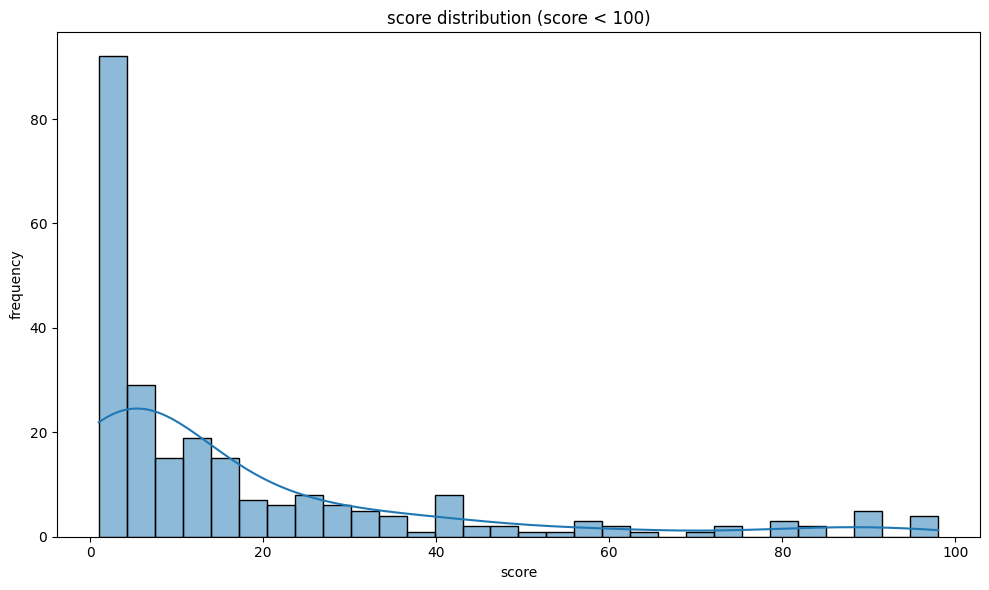

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_clean[df_clean['score'] < 100]['score'], bins=30, kde=True)
plt.title('score distribution (score < 100)')
plt.xlabel('score')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

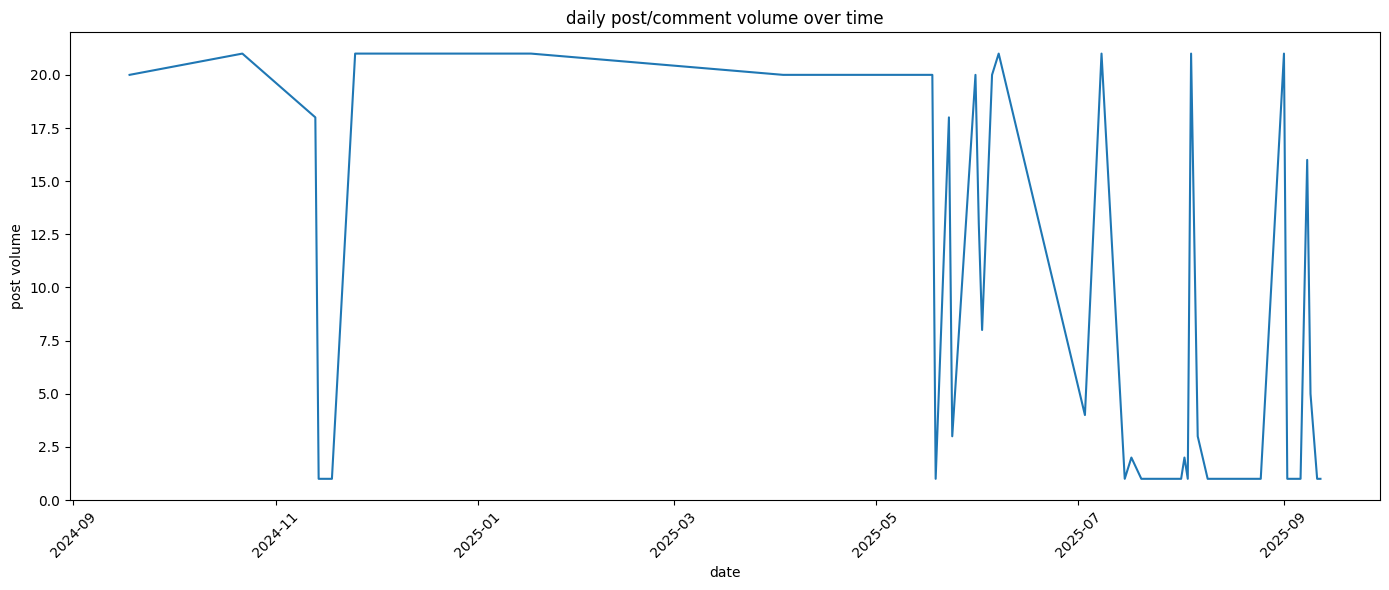

In [29]:
daily_posts = df_clean.groupby('date').size()
monthly_posts = df_clean.groupby('month').size()

plt.figure(figsize=(14, 6))
daily_posts.plot()
plt.title('daily post/comment volume over time')
plt.xlabel('date')
plt.ylabel('post volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

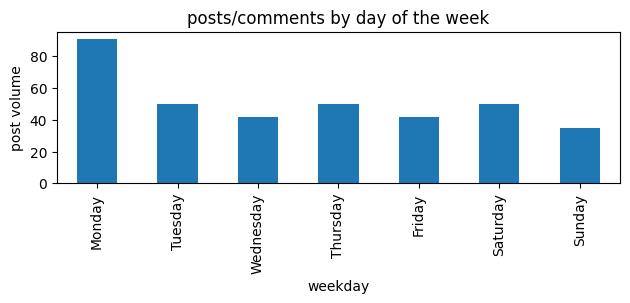

In [30]:
plt.subplot(2, 1, 2)
df_clean['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
plt.title('posts/comments by day of the week')
plt.xlabel('weekday')
plt.ylabel('post volume')
plt.tight_layout()
plt.show()

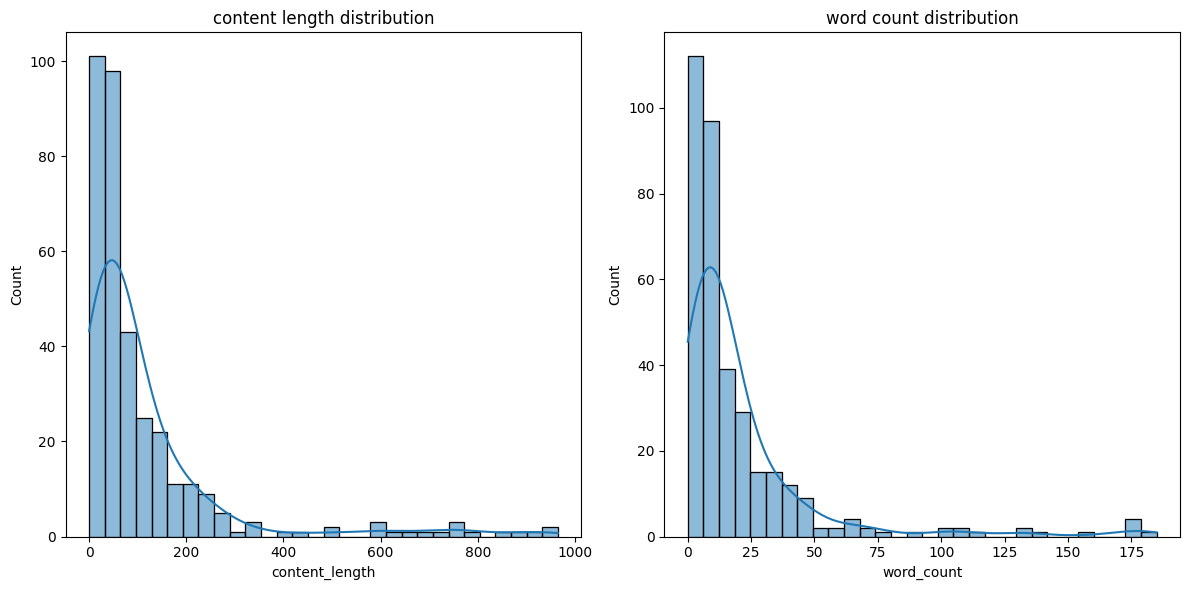

In [31]:
# 内容长度分析
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_clean[df_clean['content_length'] < 1000]['content_length'], bins=30, kde=True)
plt.title('content length distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_clean[df_clean['word_count'] < 200]['word_count'], bins=30, kde=True)
plt.title('word count distribution')
plt.tight_layout()
plt.show()

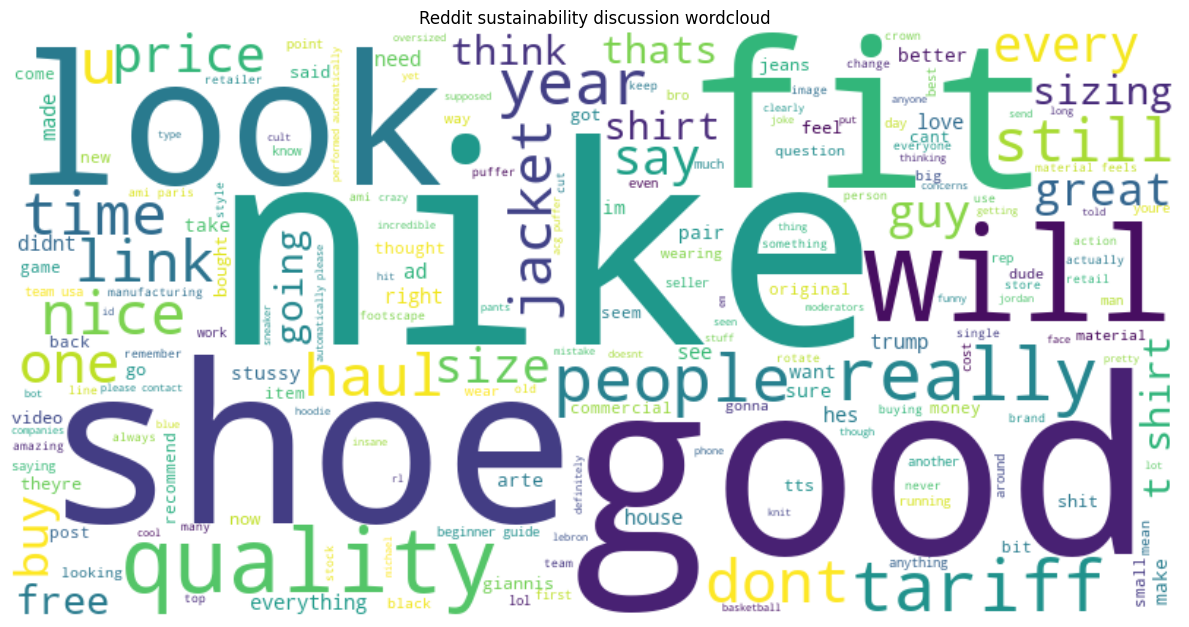

In [32]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)

all_text = ' '.join(df_clean['cleaned_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Reddit sustainability discussion wordcloud')
plt.tight_layout()
plt.show()

In [33]:
# 找出最受欢迎的帖子
top_posts = df_clean[df_clean['type'] == 'post'].nlargest(10, 'score')[['title', 'score', 'num_comments', 'subreddit', 'created_date']]
print("最受欢迎的10个帖子:")
print(top_posts)

high_engagement = df_clean[df_clean['type'] == 'post'].copy()
high_engagement['engagement_rate'] = high_engagement['num_comments'] / high_engagement['score'].replace(0, 1)
top_engagement = high_engagement.nlargest(10, 'engagement_rate')[['title', 'score', 'num_comments', 'engagement_rate', 'subreddit']]
print("\n最高互动率的10个帖子:")
print(top_engagement)

最受欢迎的10个帖子:
                                                 title  score  num_comments  \
114                                        A Nike Edit  78584         667.0   
198  A Nike ad that aired during the 2000 Summer Ol...  54209        1634.0   
135  TIL Nike made an ad where a Samburu tribesman ...  29808         316.0   
156                 Hope Nike doesn't sue him for this  24289         387.0   
219       Just saw a Nike exec fall down to his knees.  15957         885.0   
261  [Jaylen Brown] "In 2028, if I have to sign to ...   8812        1749.0   
240  Trump's massive 46% Vietnam tariffs could hit ...   7038         562.0   
324  Members of The Heaven's Gate cult shortly afte...   5382         539.0   
282     Guy in crowd at OKC/Denver game with Nike Mags   4495         405.0   
177  Got my warranty claim back from Nike today wit...   4219         462.0   

    subreddit        created_date  
114       all 2025-06-05 12:12:33  
198       all 2024-09-18 15:16:31  
135       

In [34]:
active_users = df_clean['author'].value_counts().head(10)
print("最活跃的10位用户:")
print(active_users)

最活跃的10位用户:
author
AutoModerator     5
_Visuali          4
Luh_calmfit       4
Colal             3
KratomCrazy899    2
No_Notice_5674    2
sergechewbacca    2
dannydutch1       2
GazaMode          2
j33vinthe6        1
Name: count, dtype: int64


/var/folders/9p/c1r1xtp969d9gbl728dzqnl40000gn/T/ipykernel_21884/1742260425.py:47: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_clean['month'] = df_clean['created_date'].dt.to_period('M')


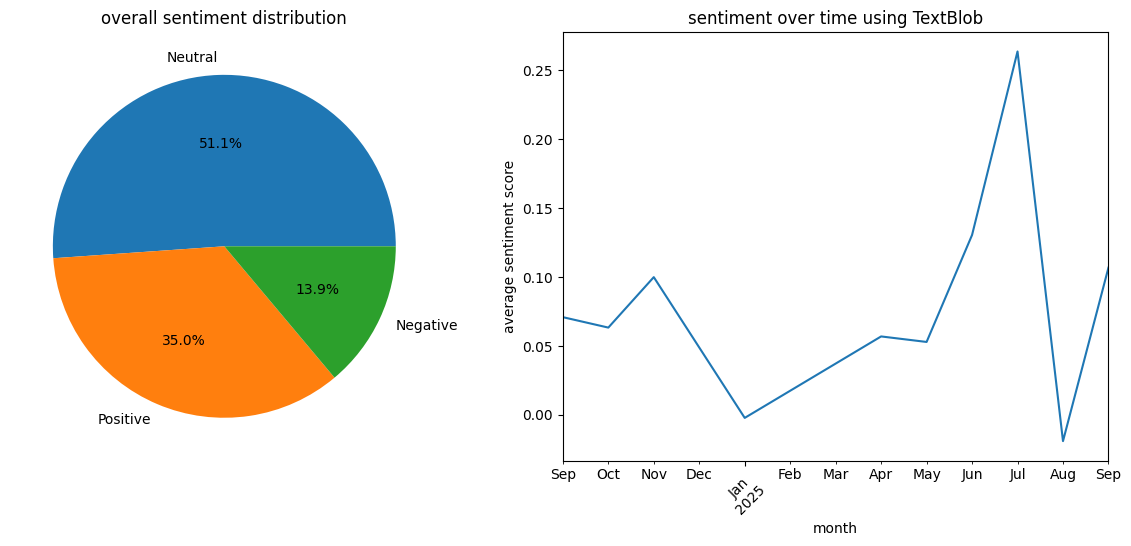

'\nkeyword_sentiment = df_clean.groupby(\'keyword\')[\'sentiment\'].agg([\'mean\', \'count\']).sort_values(\'count\', ascending=False)\nprint("sentiment analysis by keyword:")\nprint(keyword_sentiment)\n'

In [ ]:
from textblob import TextBlob

# 使用TextBlob进行情感分析
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df_clean['sentiment'] = df_clean['cleaned_content'].apply(analyze_sentiment)

# 分类情感
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_clean['sentiment_category'] = df_clean['sentiment'].apply(categorize_sentiment)


# 情感分布
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sentiment_counts = df_clean['sentiment_category'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('overall sentiment distribution')

plt.subplot(2, 2, 2)
# 情感随时间变化
df_clean['month'] = df_clean['created_date'].dt.to_period('M')
monthly_sentiment = df_clean.groupby('month')['sentiment'].mean()
monthly_sentiment.plot()
plt.title('sentiment over time using TextBlob')
plt.xlabel('month')
plt.ylabel('average sentiment score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')

/var/folders/9p/c1r1xtp969d9gbl728dzqnl40000gn/T/ipykernel_21884/1048473741.py:32: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_clean['month'] = df_clean['created_date'].dt.to_period('M')


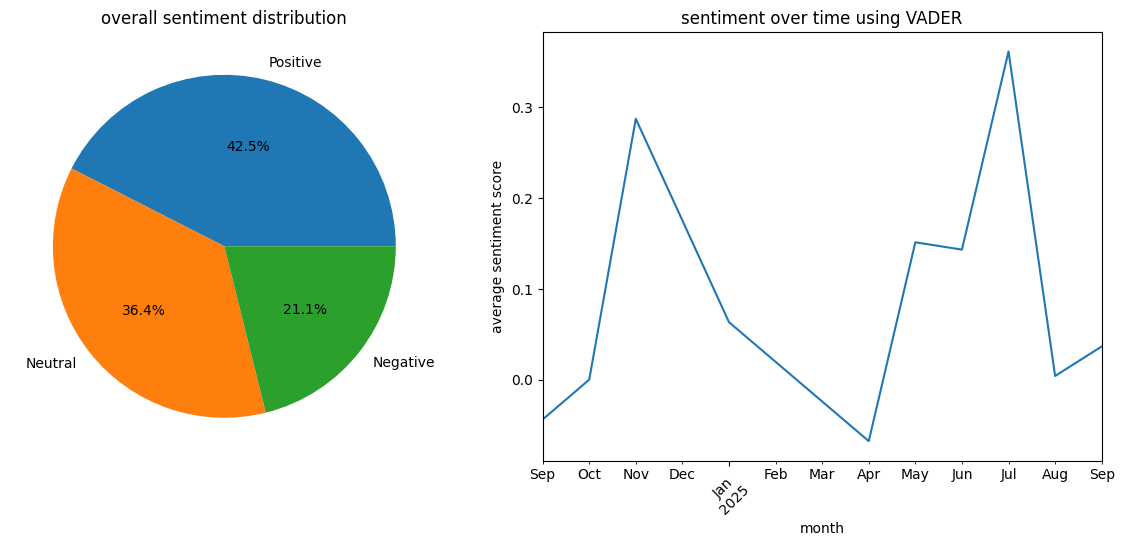

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# 使用VADER进行情感分析
def analyze_sentiment(text): 
    scores = analyzer.polarity_scores(text)  
    return scores['compound'] 

df_clean['sentiment'] = df_clean['cleaned_content'].apply(analyze_sentiment)

def categorize_sentiment(score):
    if score >= 0.1:
        return 'Positive'
    elif score <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_clean['sentiment_category'] = df_clean['sentiment'].apply(categorize_sentiment)

# 情感分布
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sentiment_counts = df_clean['sentiment_category'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('overall sentiment distribution')

plt.subplot(2, 2, 2)

# 情感随时间变化
df_clean['month'] = df_clean['created_date'].dt.to_period('M')
monthly_sentiment = df_clean.groupby('month')['sentiment'].mean()
monthly_sentiment.plot()
plt.title('sentiment over time using VADER')
plt.xlabel('month')
plt.ylabel('average sentiment score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()